<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/bdm/Thruth%20Archive/Modin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2019 Airline Delays w/Weather and Airport Detail

Classification dataset which includes aircraft, weather, airport, and employment. In this Exploratory Data Analysis (EDA), we delve into the Airline Cancellation dataset using Pandas, a parallel computing library that enhances the efficiency of our data exploration. Our aim is to uncover insights that shed light on the patterns and factors associated with flight cancellations, providing a foundation for improving operational resilience in the airline industry.

The main application of Modin is accelerating and scaling up your data analysis work, especially for large datasets. Modin is especially useful if you already know Pandas, but need to process data more efficiently. With seamless integration with Pandas, Modin takes full advantage of parallelism and enables you to use all the cores on your CPU, making operations much faster than Pandas's one-core approach.

PROJECT TEAM:
HAZEM TAHER OMRAN FENNEER
SHIVANESH A/L SIVAKUMAR
NUR SHAHIRAH JAILANI
MUSTAFA GHAZI TALAB

## Downloading the Dataset

**TODO** - add some explanation here


We downloaded the dataset in Kaggle, first we link this project with google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d threnjen/2019-airline-delays-and-cancellations

100% 754M/754M [00:33<00:00, 22.6MB/s]
100% 754M/754M [00:33<00:00, 23.4MB/s]


In [ ]:
! unzip 2019-airline-delays-and-cancellations.zip

Archive:  2019-airline-delays-and-cancellations.zip
  inflating: full_data_flightdelay.csv  
  inflating: raw_data/AIRPORT_COORDINATES.csv  
  inflating: raw_data/B43_AIRCRAFT_INVENTORY.csv  
  inflating: raw_data/CARRIER_DECODE.csv  
  inflating: raw_data/GHCND_documentation.pdf  
  inflating: raw_data/ONTIME_REPORTING_01.csv  
  inflating: raw_data/ONTIME_REPORTING_02.csv  
  inflating: raw_data/ONTIME_REPORTING_03.csv  
  inflating: raw_data/ONTIME_REPORTING_04.csv  
  inflating: raw_data/ONTIME_REPORTING_05.csv  
  inflating: raw_data/ONTIME_REPORTING_06.csv  
  inflating: raw_data/ONTIME_REPORTING_07.csv  
  inflating: raw_data/ONTIME_REPORTING_08.csv  
  inflating: raw_data/ONTIME_REPORTING_09.csv  
  inflating: raw_data/ONTIME_REPORTING_10.csv  
  inflating: raw_data/ONTIME_REPORTING_11.csv  
  inflating: raw_data/ONTIME_REPORTING_12.csv  
  inflating: raw_data/ONTIME_REPORTING_2020_01.csv  
  inflating: raw_data/ONTIME_REPORTING_2020_02.csv  
  inflating: raw_data/ONTIME_REPORT

In [ ]:
! pip install "modin[all]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 9.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 

The dataset has been downloaded and extracted.

Now we start with the project. Starting with importing the needed libraries

In [ ]:
import modin.pandas as md
import matplotlib.pyplot as plt
import seaborn as sns
import ray

In [ ]:
%%time
df = md.read_csv("/content/train.csv")
df

To remove this warning, run the following python code before doing dataframe operations:

    import ray
    ray.init()

2023-12-23 11:24:09,296	INFO worker.py:1724 -- Started a local Ray instance.


CPU times: user 3.12 s, sys: 1.83 s, total: 4.95 s
Wall time: 59.2 s


,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,7,7,0,1500-1559,3,3,26,160,American Airlines Inc.,19534,...,Chicago O'Hare International,0.00,0.0,0.0,95.0,4.25,0.237709,0.273236,0.222538,0.255479
1,4,1,0,1300-1359,4,4,63,50,SkyWest Airlines Inc.,18788,...,El Paso International,0.00,0.0,0.0,71.0,11.41,0.154651,0.121849,0.237972,0.197503
2,11,4,0,0001-0559,2,1,3,76,American Eagle Airlines Inc.,1148,...,NONE,0.00,0.0,0.0,54.0,0.45,0.117559,0.187867,0.139886,0.060327
3,3,2,0,1500-1559,7,5,14,143,Southwest Airlines Co.,7612,...,San Jose International,0.00,0.0,0.0,64.0,8.05,0.204389,0.141446,0.132868,0.202037
4,7,3,0,0800-0859,1,2,85,50,American Eagle Airlines Inc.,29376,...,Cincinnati/Northern Kentucky International,0.01,0.0,0.0,94.0,10.51,0.203263,0.193761,0.203027,0.113050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4542338,6,4,0,1500-1559,2,5,4,70,Comair Inc.,1190,...,Philadelphia International,0.00,0.0,0.0,86.0,4.92,0.217198,0.222554,0.251477,0.292230
4542339,4,4,1,2100-2159,2,9,12,143,Southwest Airlines Co.,5669,...,Austin - Bergstrom International,0.00,0.0,0.0,85.0,8.05,0.215726,0.192585,0.171317,0.263840
4542340,4,7,1,1900-1959,6,5,21,175,Southwest Airlines Co.,14827,...,Portland International,0.00,0.0,0.0,89.0,4.03,0.215726,0.112840,0.203724,0.266095
4542341,12,7,0,2000-2059,3,6,69,110,Delta Air Lines Inc.,13603,...,Douglas Municipal,0.38,0.0,0.0,44.0,9.17,0.157390,0.186040,0.226980,0.286800


## Data Preparation and Cleaning

**TODO** - Write some explanation here.



> Instructions (delete this cell):
>
> - Load the dataset
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [ ]:
%%time
df.columns

CPU times: user 60 µs, sys: 16 µs, total: 76 µs
Wall time: 81.5 µs


Index(['MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP',
       'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS',
       'CARRIER_NAME', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
       'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
       'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'DEPARTING_AIRPORT', 'LATITUDE',
       'LONGITUDE', 'PREVIOUS_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND',
       'CARRIER_HISTORICAL', 'DEP_AIRPORT_HIST', 'DAY_HISTORICAL',
       'DEP_BLOCK_HIST'],
      dtype='object')

In [ ]:
%%time
df.describe()

CPU times: user 78 ms, sys: 3.56 ms, total: 81.6 ms
Wall time: 88.7 ms


,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
count,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,...,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06
mean,6.607797e+00,3.936490e+00,1.891442e-01,3.820224e+00,3.047252e+00,2.784461e+01,1.337606e+02,1.268924e+04,6.296192e+04,3.460356e+03,...,-9.425521e+01,1.036814e-01,3.165849e-02,9.155284e-02,7.147218e+01,8.340974e+00,1.891442e-01,1.878673e-01,1.891442e-01,1.891442e-01
std,3.396624e+00,1.995264e+00,3.916232e-01,2.381773e+00,1.758031e+00,2.151413e+01,4.647480e+01,8.841531e+03,3.437931e+04,4.253083e+03,...,1.790883e+01,3.442350e-01,3.168396e-01,7.287768e-01,1.835304e+01,3.607055e+00,4.744698e-02,4.154322e-02,3.827405e-02,7.767083e-02
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.400000e+01,1.100000e+03,5.582000e+03,1.000000e+00,...,-1.593460e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+01,0.000000e+00,6.440829e-02,4.342273e-02,1.044504e-01,5.556236e-02
25%,4.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,1.100000e+01,9.000000e+01,5.345000e+03,2.503400e+04,6.550000e+02,...,-1.063770e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.900000e+01,5.820000e+00,1.546513e-01,1.667402e-01,1.608679e-01,1.273809e-01
50%,7.000000e+00,4.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,2.300000e+01,1.430000e+02,1.156200e+04,7.087800e+04,2.251000e+03,...,-8.790600e+01,0.000000e+00,0.000000e+00,0.000000e+00,7.400000e+01,7.830000e+00,1.865162e-01,1.878673e-01,1.914734e-01,1.874842e-01
75%,1.000000e+01,6.000000e+00,0.000000e+00,5.000000e+00,4.000000e+00,3.900000e+01,1.720000e+02,1.761500e+04,8.631200e+04,4.806000e+03,...,-8.093600e+01,2.000000e-02,0.000000e+00,0.000000e+00,8.600000e+01,1.029000e+01,2.159451e-01,2.024857e-01,2.199390e-01,2.437018e-01
max,1.200000e+01,7.000000e+00,1.000000e+00,1.100000e+01,1.500000e+01,1.090000e+02,3.370000e+02,3.525600e+04,1.177280e+05,2.183700e+04,...,-6.600200e+01,1.163000e+01,1.720000e+01,2.520000e+01,1.150000e+02,3.378000e+01,3.502349e-01,3.521604e-01,2.707092e-01,3.906001e-01


In [ ]:
%%time
print("Missing values per column:")
df.isnull().sum()

Missing values per column:
CPU times: user 25.6 ms, sys: 4.87 ms, total: 30.5 ms
Wall time: 60.5 ms


MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
CARRIER_HISTORICAL               0
DEP_AIRPORT_HIST                 0
DAY_HISTORICAL      

As we can see there's no missing values in this dataset.

In [ ]:
df['DEP_TIME_BLK'] = md.to_datetime(df['DEP_TIME_BLK'], format='%H%M', errors='coerce')

df['DEPARTING_AIRPORT'] = df['DEPARTING_AIRPORT'].astype('category')
df['PREVIOUS_AIRPORT'] = df['PREVIOUS_AIRPORT'].astype('category')

df['CARRIER_NAME'] = df['CARRIER_NAME'].astype('category')

df['DEP_DEL15'] = df['DEP_DEL15'].astype(bool)

In [ ]:
%%time

df['CARRIER_NAME'] = df['CARRIER_NAME'].astype('category')
df['DEPARTING_AIRPORT'] = df['DEPARTING_AIRPORT'].astype('category')
df['PREVIOUS_AIRPORT'] = df['PREVIOUS_AIRPORT'].astype('category')


df['FLT_ATTENDANTS_PER_PASS'] = df['FLT_ATTENDANTS_PER_PASS'].astype('float32')
df['GROUND_SERV_PER_PASS'] = df['GROUND_SERV_PER_PASS'].astype('float32')


df['MONTH'] = df['MONTH'].astype('int8')
df['DAY_OF_WEEK'] = df['DAY_OF_WEEK'].astype('int8')
df['DISTANCE_GROUP'] = df['DISTANCE_GROUP'].astype('int32')
df['SEGMENT_NUMBER'] = df['SEGMENT_NUMBER'].astype('int32')

integer_columns = ['SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS',
                   'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH',
                   'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
                   'AVG_MONTHLY_PASS_AIRLINE', 'PLANE_AGE']

for col in integer_columns:
    df[col] = df[col].astype('int32')




CPU times: user 164 ms, sys: 9.41 ms, total: 173 ms
Wall time: 183 ms


Here, we chnaged the types of some columns to make our analysis easier.


In [ ]:
df.dtypes

MONTH                                      int8
DAY_OF_WEEK                                int8
DEP_DEL15                                  bool
DEP_TIME_BLK                     datetime64[ns]
DISTANCE_GROUP                            int64
SEGMENT_NUMBER                            int64
CONCURRENT_FLIGHTS                        int64
NUMBER_OF_SEATS                           int64
CARRIER_NAME                           category
AIRPORT_FLIGHTS_MONTH                     int64
AIRLINE_FLIGHTS_MONTH                     int64
AIRLINE_AIRPORT_FLIGHTS_MONTH             int64
AVG_MONTHLY_PASS_AIRPORT                  int64
AVG_MONTHLY_PASS_AIRLINE                  int64
FLT_ATTENDANTS_PER_PASS                 float64
GROUND_SERV_PER_PASS                    float64
PLANE_AGE                                 int64
DEPARTING_AIRPORT                      category
LATITUDE                                float64
LONGITUDE                               float64
PREVIOUS_AIRPORT                       c

## Exploratory Analysis and Visualization

**TODO** - write some explanation here.



> Instructions (delete this cell)
>
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

the groupby keys will be sorted anyway, although the 'sort=False' was passed. See the following issue for more details: https://github.com/modin-project/modin/issues/3571.


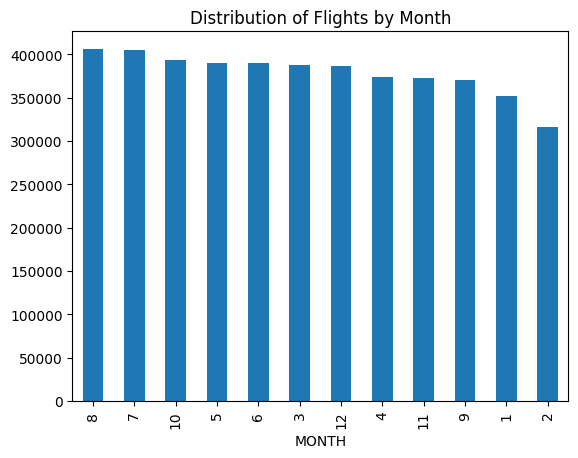

In [ ]:
df['MONTH'].value_counts().plot(kind='bar', title='Distribution of Flights by Month')
plt.show()

This code utilizes Seaborn to create a count plot, illustrating the distribution of flights for each day of the week.

In [ ]:
df['DEP_DEL15'] = df['DEP_DEL15'].astype('category')

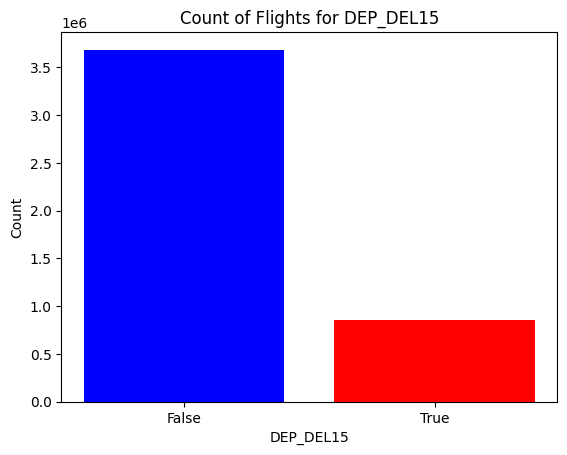

CPU times: user 343 ms, sys: 115 ms, total: 457 ms
Wall time: 512 ms


In [ ]:
%%time
value_counts = df['DEP_DEL15'].value_counts()
plt.bar(value_counts.index.astype(str), value_counts.values,color = ['blue', 'red'])
plt.xlabel('DEP_DEL15')
plt.ylabel('Count')
plt.title('Count of Flights for DEP_DEL15')
plt.show()


In this section, a scatter plot is created using Seaborn to visualize the relationship between 'PLANE_AGE' and 'FLT_ATTENDANTS_PER_PASS' columns

In [ ]:
day_order = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7,
}


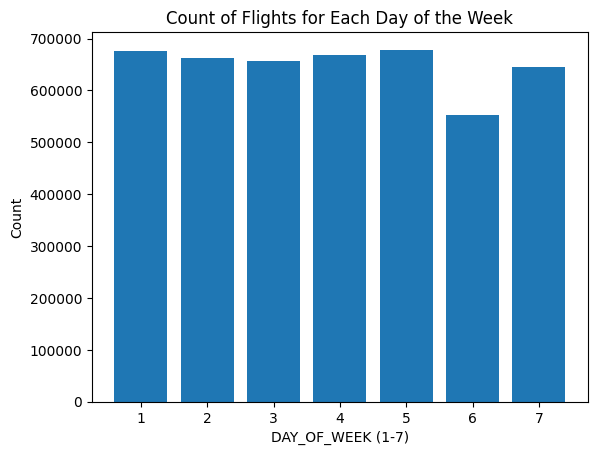

In [ ]:
df['DAY_OF_WEEK_mapped'] = df['DAY_OF_WEEK'].replace(day_order)
x = df['DAY_OF_WEEK_mapped'].value_counts()
plt.bar(x.index, x.values)
plt.xlabel('DAY_OF_WEEK (1-7)')
plt.ylabel('Count')
plt.title('Count of Flights for Each Day of the Week')
plt.xticks(range(1, 8))
plt.show()


This code utilizes Seaborn to create a count plot, illustrating the distribution of flights for each day of the week.

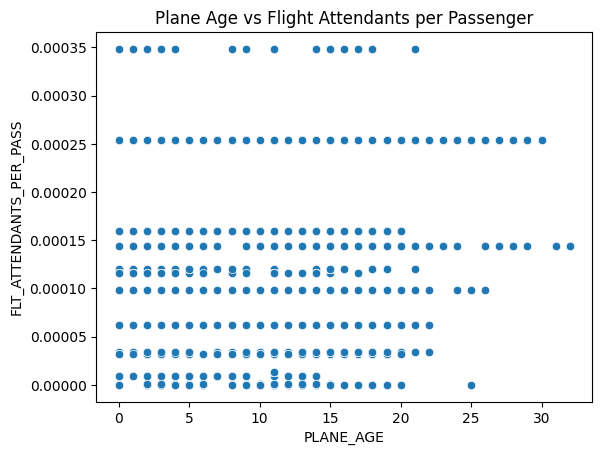

In [ ]:
sns.scatterplot(x='PLANE_AGE', y='FLT_ATTENDANTS_PER_PASS', data=df)
plt.title('Plane Age vs Flight Attendants per Passenger')
plt.show()

In this section, a scatter plot is created using Seaborn to visualize the relationship between 'PLANE_AGE' and 'FLT_ATTENDANTS_PER_PASS' columns

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs


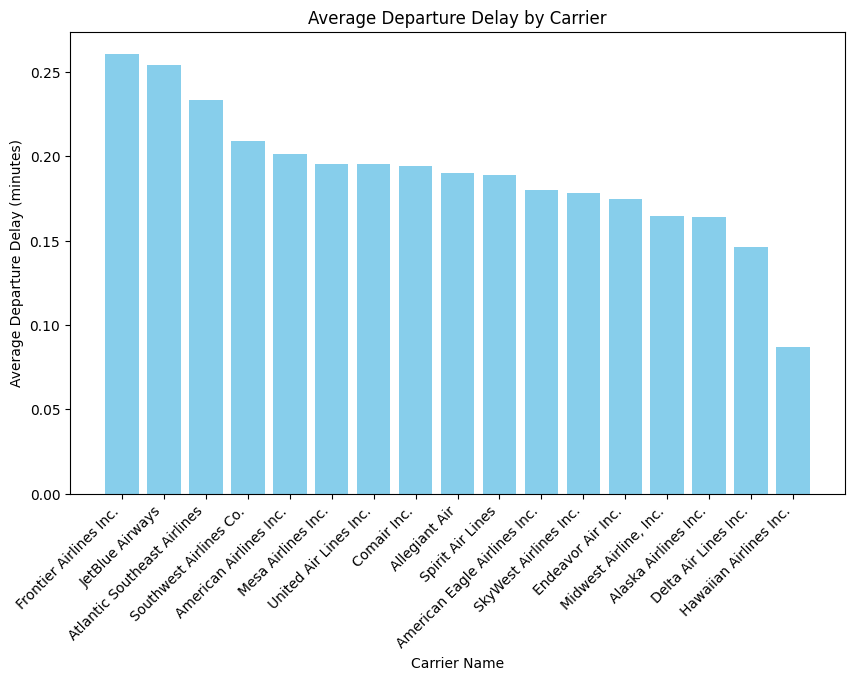

In [ ]:
%time
carrier_performance = df.groupby('CARRIER_NAME')['DEP_DEL15'].mean().reset_index()

carrier_performance = carrier_performance.sort_values(by='DEP_DEL15', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(carrier_performance['CARRIER_NAME'], carrier_performance['DEP_DEL15'], color='skyblue')
plt.title('Average Departure Delay by Carrier')
plt.xlabel('Carrier Name')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(rotation=45, ha='right')
plt.show()

The Code below will be used to see the heatmap of this dataset.

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.3 µs


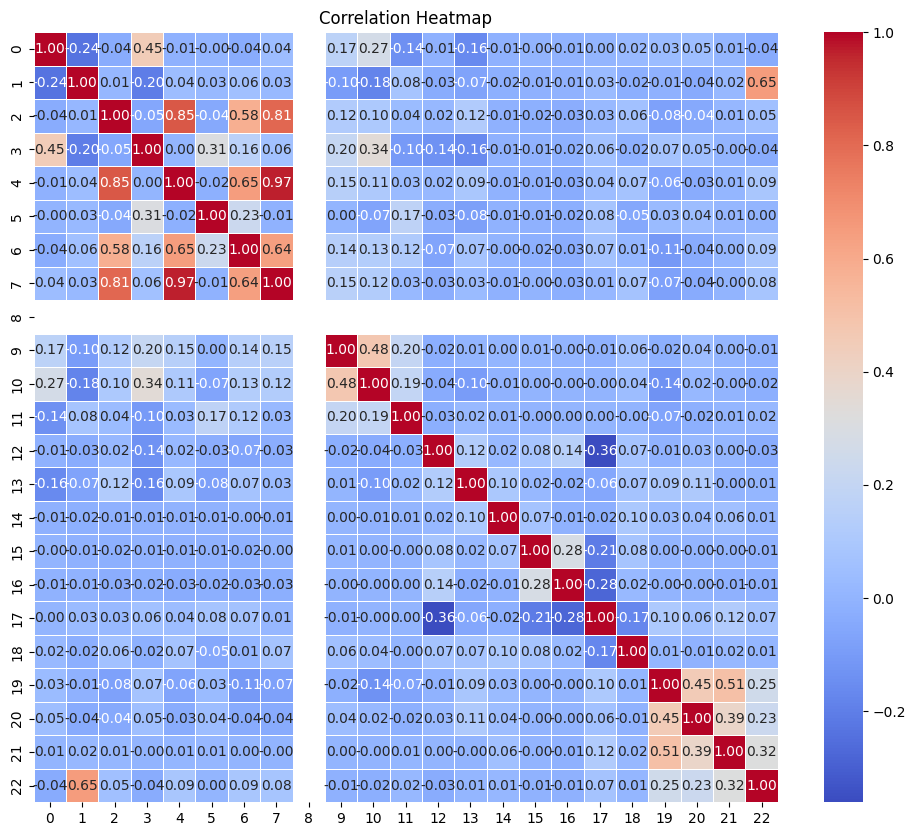

In [ ]:
%time
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



## Asking and Answering Questions




#### Q1: Which carrier has the best and worst average departure delays?

In [ ]:
%time
df['DEP_DEL15'] = df['DEP_DEL15'].astype(float)

carrier_avg_delays = df.groupby('CARRIER_NAME')['DEP_DEL15'].mean().reset_index()
best_carrier = carrier_avg_delays.loc[carrier_avg_delays['DEP_DEL15'].idxmin()]
worst_carrier = carrier_avg_delays.loc[carrier_avg_delays['DEP_DEL15'].idxmax()]

print(f"The carrier with the best average departure delay is: {best_carrier['CARRIER_NAME']} ({best_carrier['DEP_DEL15']:.2f} minutes)")
print(f"The carrier with the worst average departure delay is: {worst_carrier['CARRIER_NAME']} ({worst_carrier['DEP_DEL15']:.2f} minutes)")


CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 11.4 µs
The carrier with the best average departure delay is: Hawaiian Airlines Inc. (0.09 minutes)
The carrier with the worst average departure delay is: Frontier Airlines Inc. (0.26 minutes)


#### Q2: Are there specific months or days of the week with higher average departure delays?

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 9.78 µs


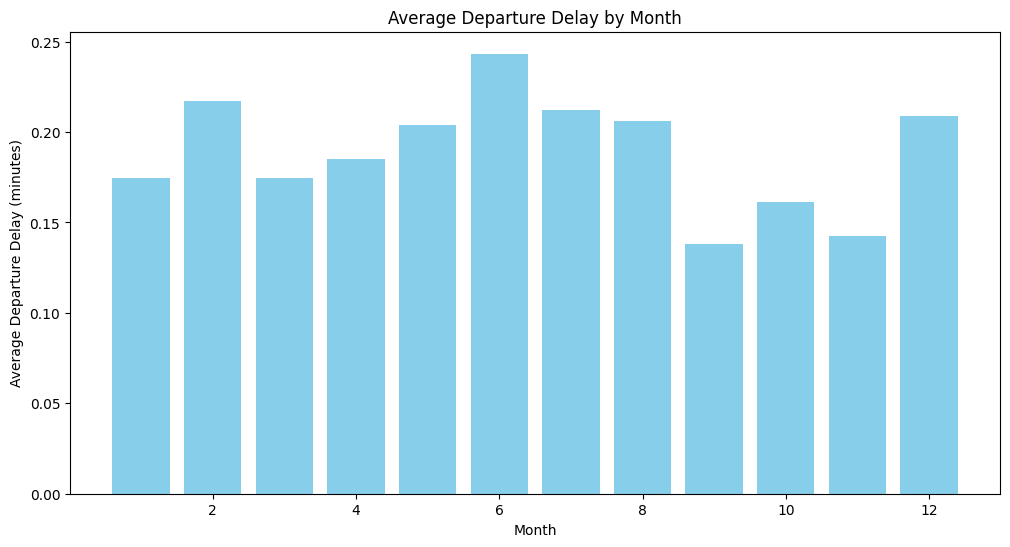

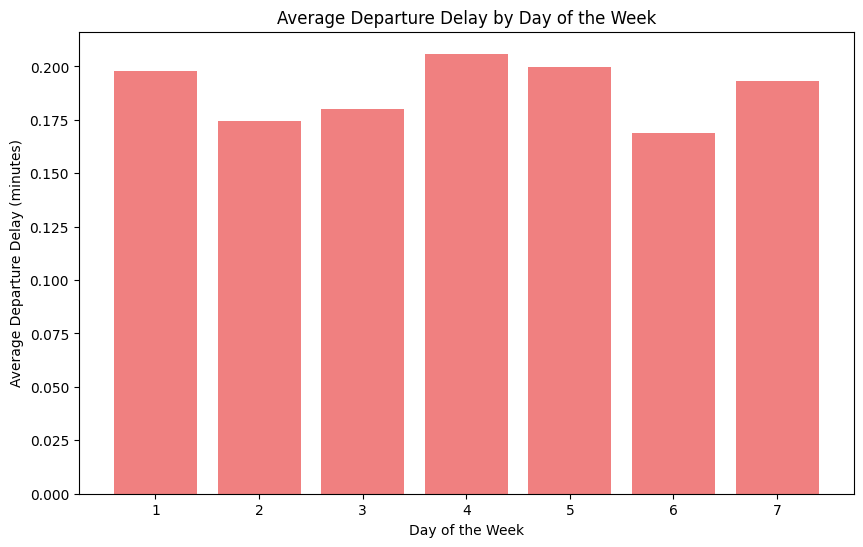

In [ ]:
%time
average_delay_by_month = df.groupby('MONTH')['DEP_DEL15'].mean().reset_index()


average_delay_by_day = df.groupby('DAY_OF_WEEK')['DEP_DEL15'].mean().reset_index()


plt.figure(figsize=(12, 6))
plt.bar(average_delay_by_month['MONTH'], average_delay_by_month['DEP_DEL15'], color='skyblue')
plt.title('Average Departure Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Departure Delay (minutes)')
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(average_delay_by_day['DAY_OF_WEEK'], average_delay_by_day['DEP_DEL15'], color='lightcoral')
plt.title('Average Departure Delay by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Departure Delay (minutes)')
plt.show()



#### Q3: How does aircraft size (number of seats) relate to delays or other operational factors?

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 12.2 µs


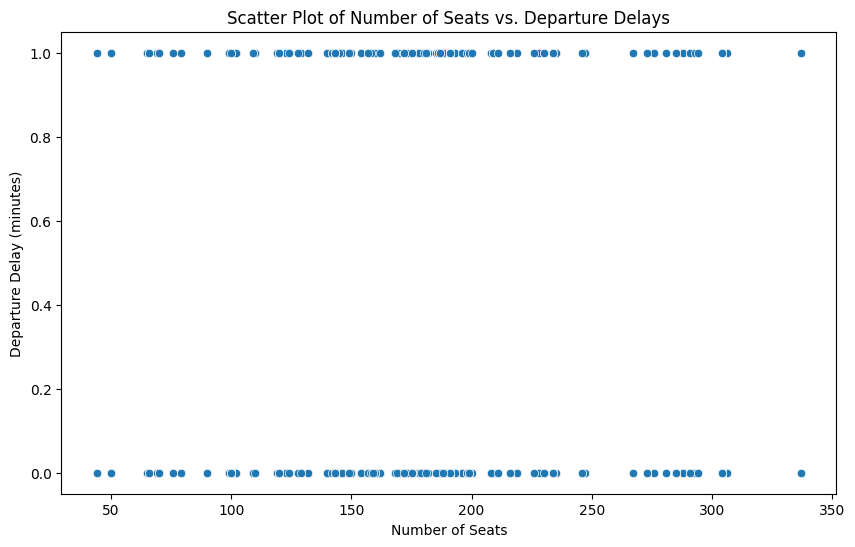

In [ ]:
%time

plt.figure(figsize=(10, 6))
sns.scatterplot(x='NUMBER_OF_SEATS', y='DEP_DEL15', data=df)
plt.title('Scatter Plot of Number of Seats vs. Departure Delays')
plt.xlabel('Number of Seats')
plt.ylabel('Departure Delay (minutes)')
plt.show()


CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.91 µs


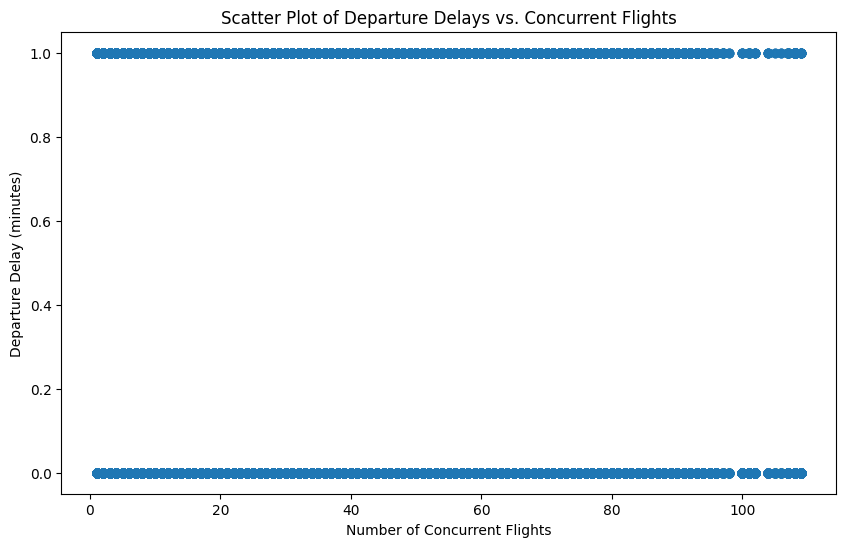

In [ ]:
%time
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['CONCURRENT_FLIGHTS'], df['DEP_DEL15'], alpha=0.5)
plt.title('Scatter Plot of Departure Delays vs. Concurrent Flights')
plt.xlabel('Number of Concurrent Flights')
plt.ylabel('Departure Delay (minutes)')
plt.show()

#### Q4: Which airline carrier consistently experiences the highest number of delays across its flights?

CPU times: user 8 µs, sys: 1e+03 ns, total: 9 µs
Wall time: 22.4 µs


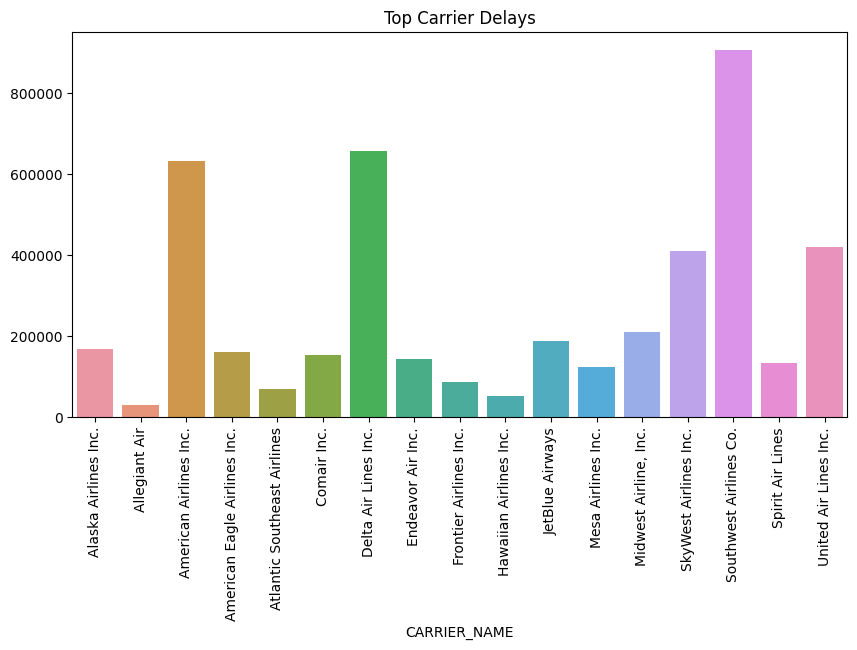

In [ ]:
%time
# Check if the column exists
if 'CARRIER_NAME' in df.columns:
    # Plot the bar chart
    Carrier_count = df['CARRIER_NAME'].value_counts()
    plt.figure(figsize=(10, 5))
    sns.barplot(x=Carrier_count.index, y=Carrier_count.values).set(title="Top Carrier Delays")
    plt.xticks(rotation='vertical')
    plt.show()
else:
    print("Column 'CARRIER_NAME' not found in the DataFrame.")


#### Q5: Which airline has the most seats?

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 9.78 µs
The airline with the most seats is Southwest Airlines Co. with 136878651 seats.


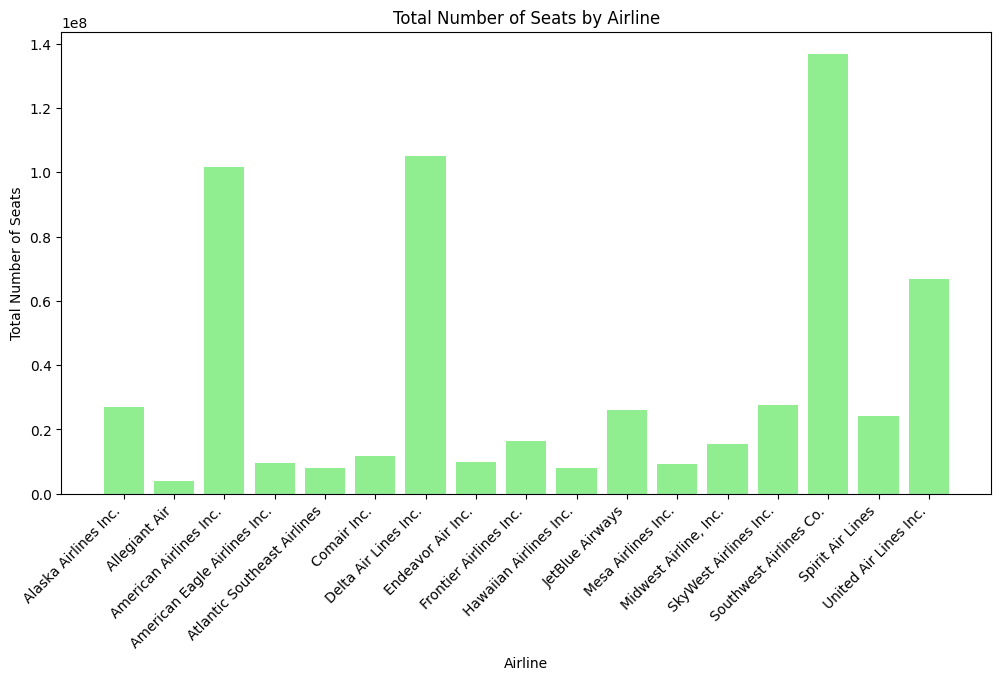

In [ ]:
%time
total_seats_by_airline = df.groupby('CARRIER_NAME')['NUMBER_OF_SEATS'].sum().reset_index()
most_seats_airline = total_seats_by_airline.loc[total_seats_by_airline['NUMBER_OF_SEATS'].idxmax()]
print(f"The airline with the most seats is {most_seats_airline['CARRIER_NAME']} with {most_seats_airline['NUMBER_OF_SEATS']} seats.")
plt.figure(figsize=(12, 6))
plt.bar(total_seats_by_airline['CARRIER_NAME'], total_seats_by_airline['NUMBER_OF_SEATS'], color='lightgreen')
plt.title('Total Number of Seats by Airline')
plt.xlabel('Airline')
plt.ylabel('Total Number of Seats')
plt.xticks(rotation=45, ha='right')
plt.show()


 Which airline carrier consistently experiences the highest number of delays across its flights?

#### Q6: Which Airline has the most number of domestic flights(less seats or smaller size of plane) ?

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 9.78 µs


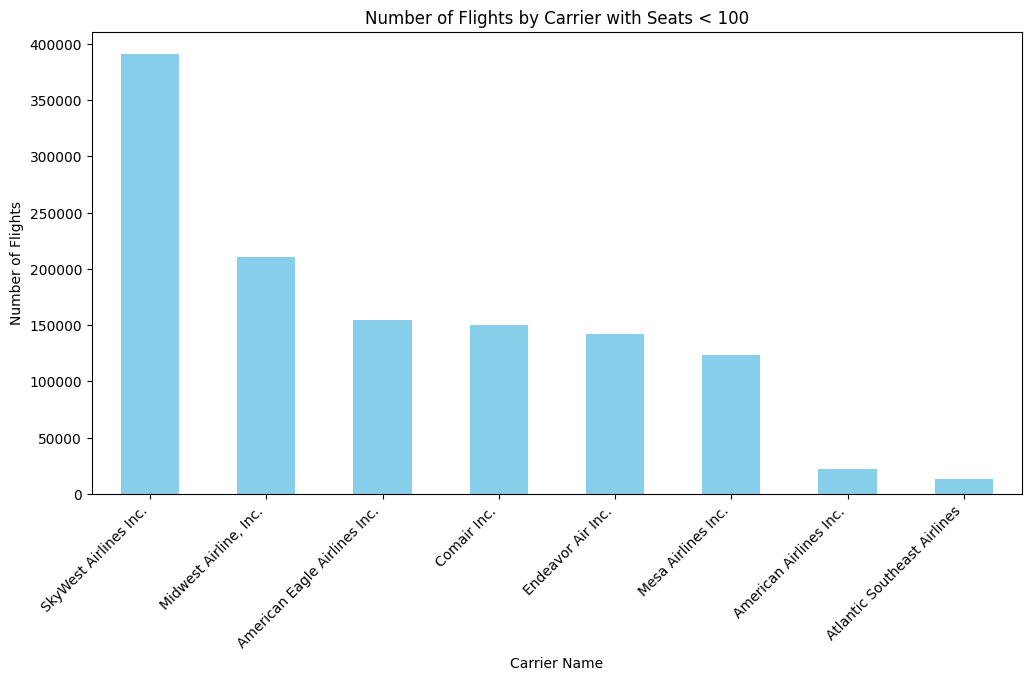

In [ ]:
%time
filtered_df = df[df['NUMBER_OF_SEATS'] < 100]
# Create a bar chart
plt.figure(figsize=(12, 6))
carrier_count = filtered_df['CARRIER_NAME'].value_counts()
carrier_count.plot(kind='bar', color='skyblue')
plt.title('Number of Flights by Carrier with Seats < 100')
plt.xlabel('Carrier Name')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right')
plt.show()


## Pros and Cons

Pros
1. Performance Improvement
Modin hastens panda operations by applying parallel processing. This ability to utilize all available CPU cores means performance improves markedly for large data

2. Ease of Integration
Modin is meant as a drop-in replacement library for pandas, so if you're already used to using the latter then making the switch to Modin doesn?. t involve changing your code too drastically.

3. Scalability
Modin allows for scalable data analysis by distributing the workload across multiple cores, making it suitable for handling larger datasets that may exceed the capacity of a single core.

Cons

1. Limited Use Cases
While Modin can significantly improve performance for certain types of operations on large datasets, its benefits may not be as pronounced for smaller datasets or operations that are not easily parallelizable.

2. Compatibility Issues
While Modin aims for compatibility with pandas, there might be cases where certain pandas features or functions are not fully supported or behave differently in Modin. Users should be cautious and test their code thoroughly.

3. Resource Usage
Depending on the size of the dataset and the complexity of operations, using all available CPU cores may lead to increased memory consumption. Users should monitor resource usage, especially on machines with limited resources.

## Inferences and Conclusion
After conducting exploratory data analysis (EDA) on the airline cancellation dataset using Modin, a parallel computing library designed to efficiently handle large datasets. This analysis, powered by Modin, lays the foundation for further investigation and potential strategies to mitigate cancellations, enhancing overall operational efficiency and passenger experience

## References and Future Work

Develop predictive models for airline cancellations and optimize operations using insights from the dataset.

Explore Modin for efficient data processing, with resources including Modin documentation, Seaborn, Matplotlib, Scikit-Learn, Kaggle, and the FlightStats API.